Analyzing Uber pickup data. You have been given several features defined and labeled by Uber using historical data and you will create a model that will predict whether or not a rider is happy about the pickup experience or not. Uber would like to know whether the features they have determined allow for a good ML model performance. 

This data set contains the following features:

* **id**: trip id assigned by Uber
* **driver_id**: id number of the driver assigned by Uber
* **uber_type**: type of the uber ride requested (Uber Black, UberX, UberPool)
* **rider_type**: type of the rider determined/labeled in-house by Uber (Premium, Commuter, HFR - High Frequency Rider, Social, Traveler, Other)
* **rendezvous_confidence**: confidence score of the rendezvous location determined based on historical trips
* **driver_distance**: the distance of the driver (in feet) to the rendezvous location when "ride has arrived" signal is sent to the rider determined based on GPS location
* **rider_distance**: the distance of the rider (in feet) to the rendezvous location when "ride has arrived" signal is sent to the rider
* **ata_vs_eta**: the time difference (in minutes) between the actual time of arrival (ATA) and the estimated time of arrival (eta)
* **happiness**: 0 or 1 indicating whether the rider is happy about the pickup experience or not (derived from ratings)

**Note**: rider_distance has missing values. I have imputed them based on another feature.




## Data Preprocessing

**Library and Data Import**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [3]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [4]:
from sklearn.ensemble import RandomForestClassifier

In [5]:
from sklearn.linear_model import LogisticRegression

In [6]:
data = pd.read_csv("uber_pickup.csv")

**Exploratory Data Analysis**


In [7]:
data.head()

,id,driver_id,uber_type,rider_type,rendezvous_confidence,rider_distance,driver_distance,ata_vs_eta,happiness
0,ID86355,NM0GE9E70F1043201,Uber Black,Traveler,5.304,29.67,3.7,0.9,1
1,ID86355,WBALZ5C56CD701241,Uber Black,Traveler,5.304,30.67,3.7,1.0,1
2,ID868202,1FTEW1E87AK806915,UberPool,HFR,3.622,22.47,10.8,1.1,1
3,ID927241,SALVN2BG6DH555886,UberPool,Traveler,4.712,29.33,5.0,1.1,1
4,ID927241,YV4902BZ0E1579049,UberPool,Traveler,4.712,29.33,5.0,1.1,1


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1138 entries, 0 to 1137
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     1138 non-null   object 
 1   driver_id              1138 non-null   object 
 2   uber_type              1138 non-null   object 
 3   rider_type             1138 non-null   object 
 4   rendezvous_confidence  1138 non-null   float64
 5   rider_distance         1032 non-null   float64
 6   driver_distance        1138 non-null   float64
 7   ata_vs_eta             1138 non-null   float64
 8   happiness              1138 non-null   int64  
dtypes: float64(4), int64(1), object(4)
memory usage: 80.1+ KB


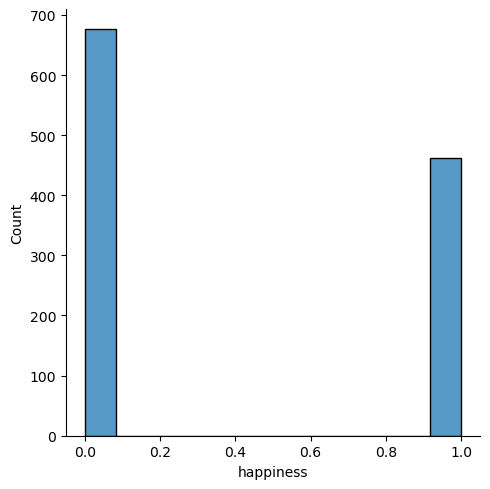

In [9]:
sns.displot(data["happiness"])

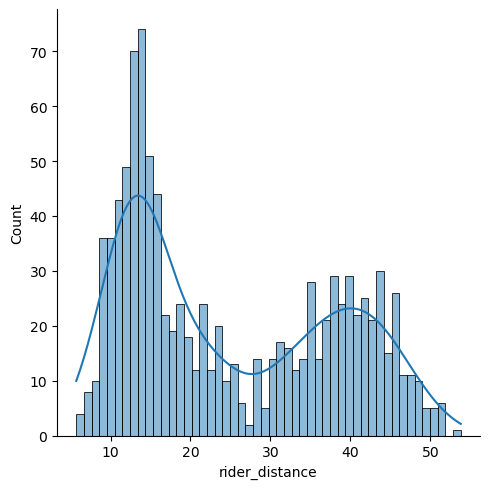

In [10]:
sns.displot(data["rider_distance"], bins = 50, kde=True)

**Data Cleaning**

In [11]:
data.isnull().sum()

id                         0
driver_id                  0
uber_type                  0
rider_type                 0
rendezvous_confidence      0
rider_distance           106
driver_distance            0
ata_vs_eta                 0
happiness                  0
dtype: int64

In [12]:
data['rider_distance'].interpolate(method='linear', inplace=True)

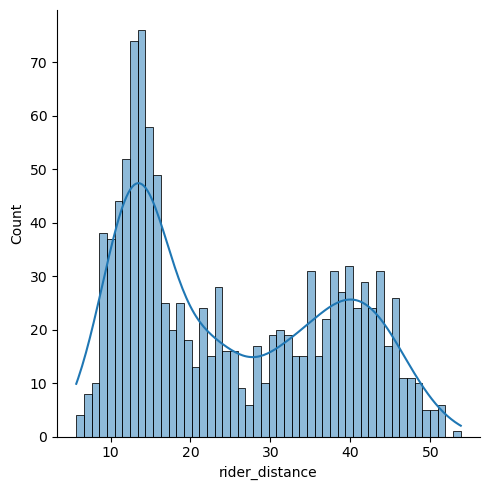

In [13]:
sns.displot(data["rider_distance"], bins = 50, kde=True)

# just checking to see distribustion hasn't changed drastically

## Train/Test Split

In [14]:
X = data.drop(columns= ["id", "driver_id", "happiness"], axis =1)
y = data["happiness"]

In [15]:
X_encoded = pd.get_dummies(X)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size = 0.2, random_state = 42)

## Algorithm Setup

### Decision Tree Classifier

In [17]:
model = DecisionTreeClassifier(max_depth = 3)

## Model Training

In [18]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

## Model Testing

In [19]:
y_pred = model.predict(X_test)

## Evaluation

In [20]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9254385964912281


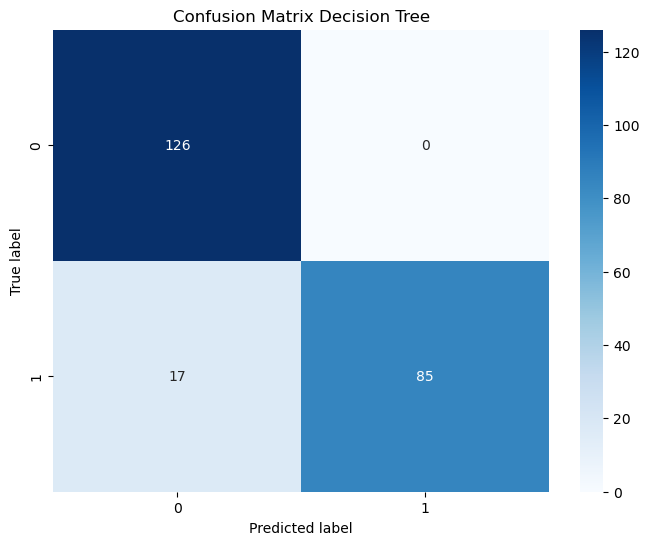

In [21]:

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix Decision Tree")
plt.show()

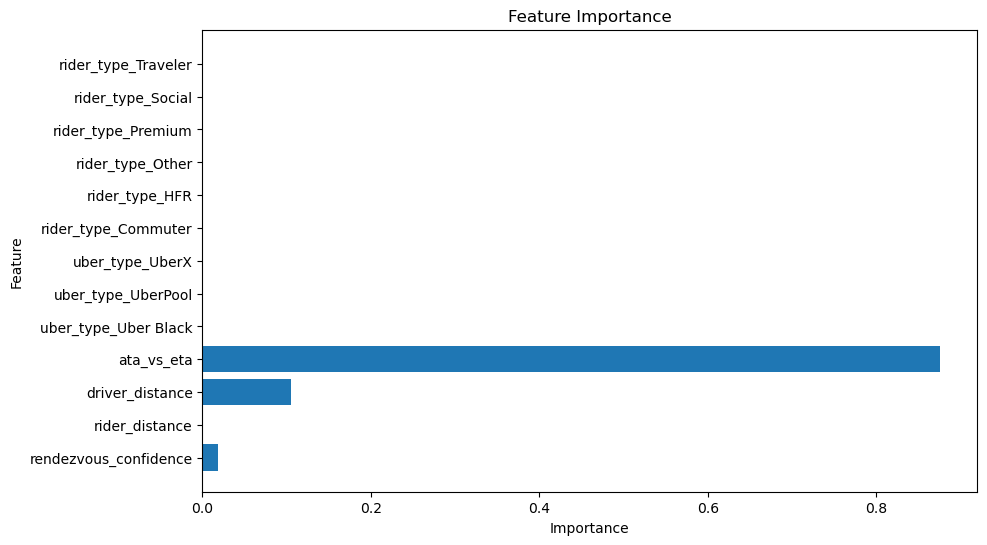

In [22]:
importance = model.feature_importances_

# Get the names of the features
feature_names = X_encoded.columns

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importance)  # Use barh for horizontal bar plot
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

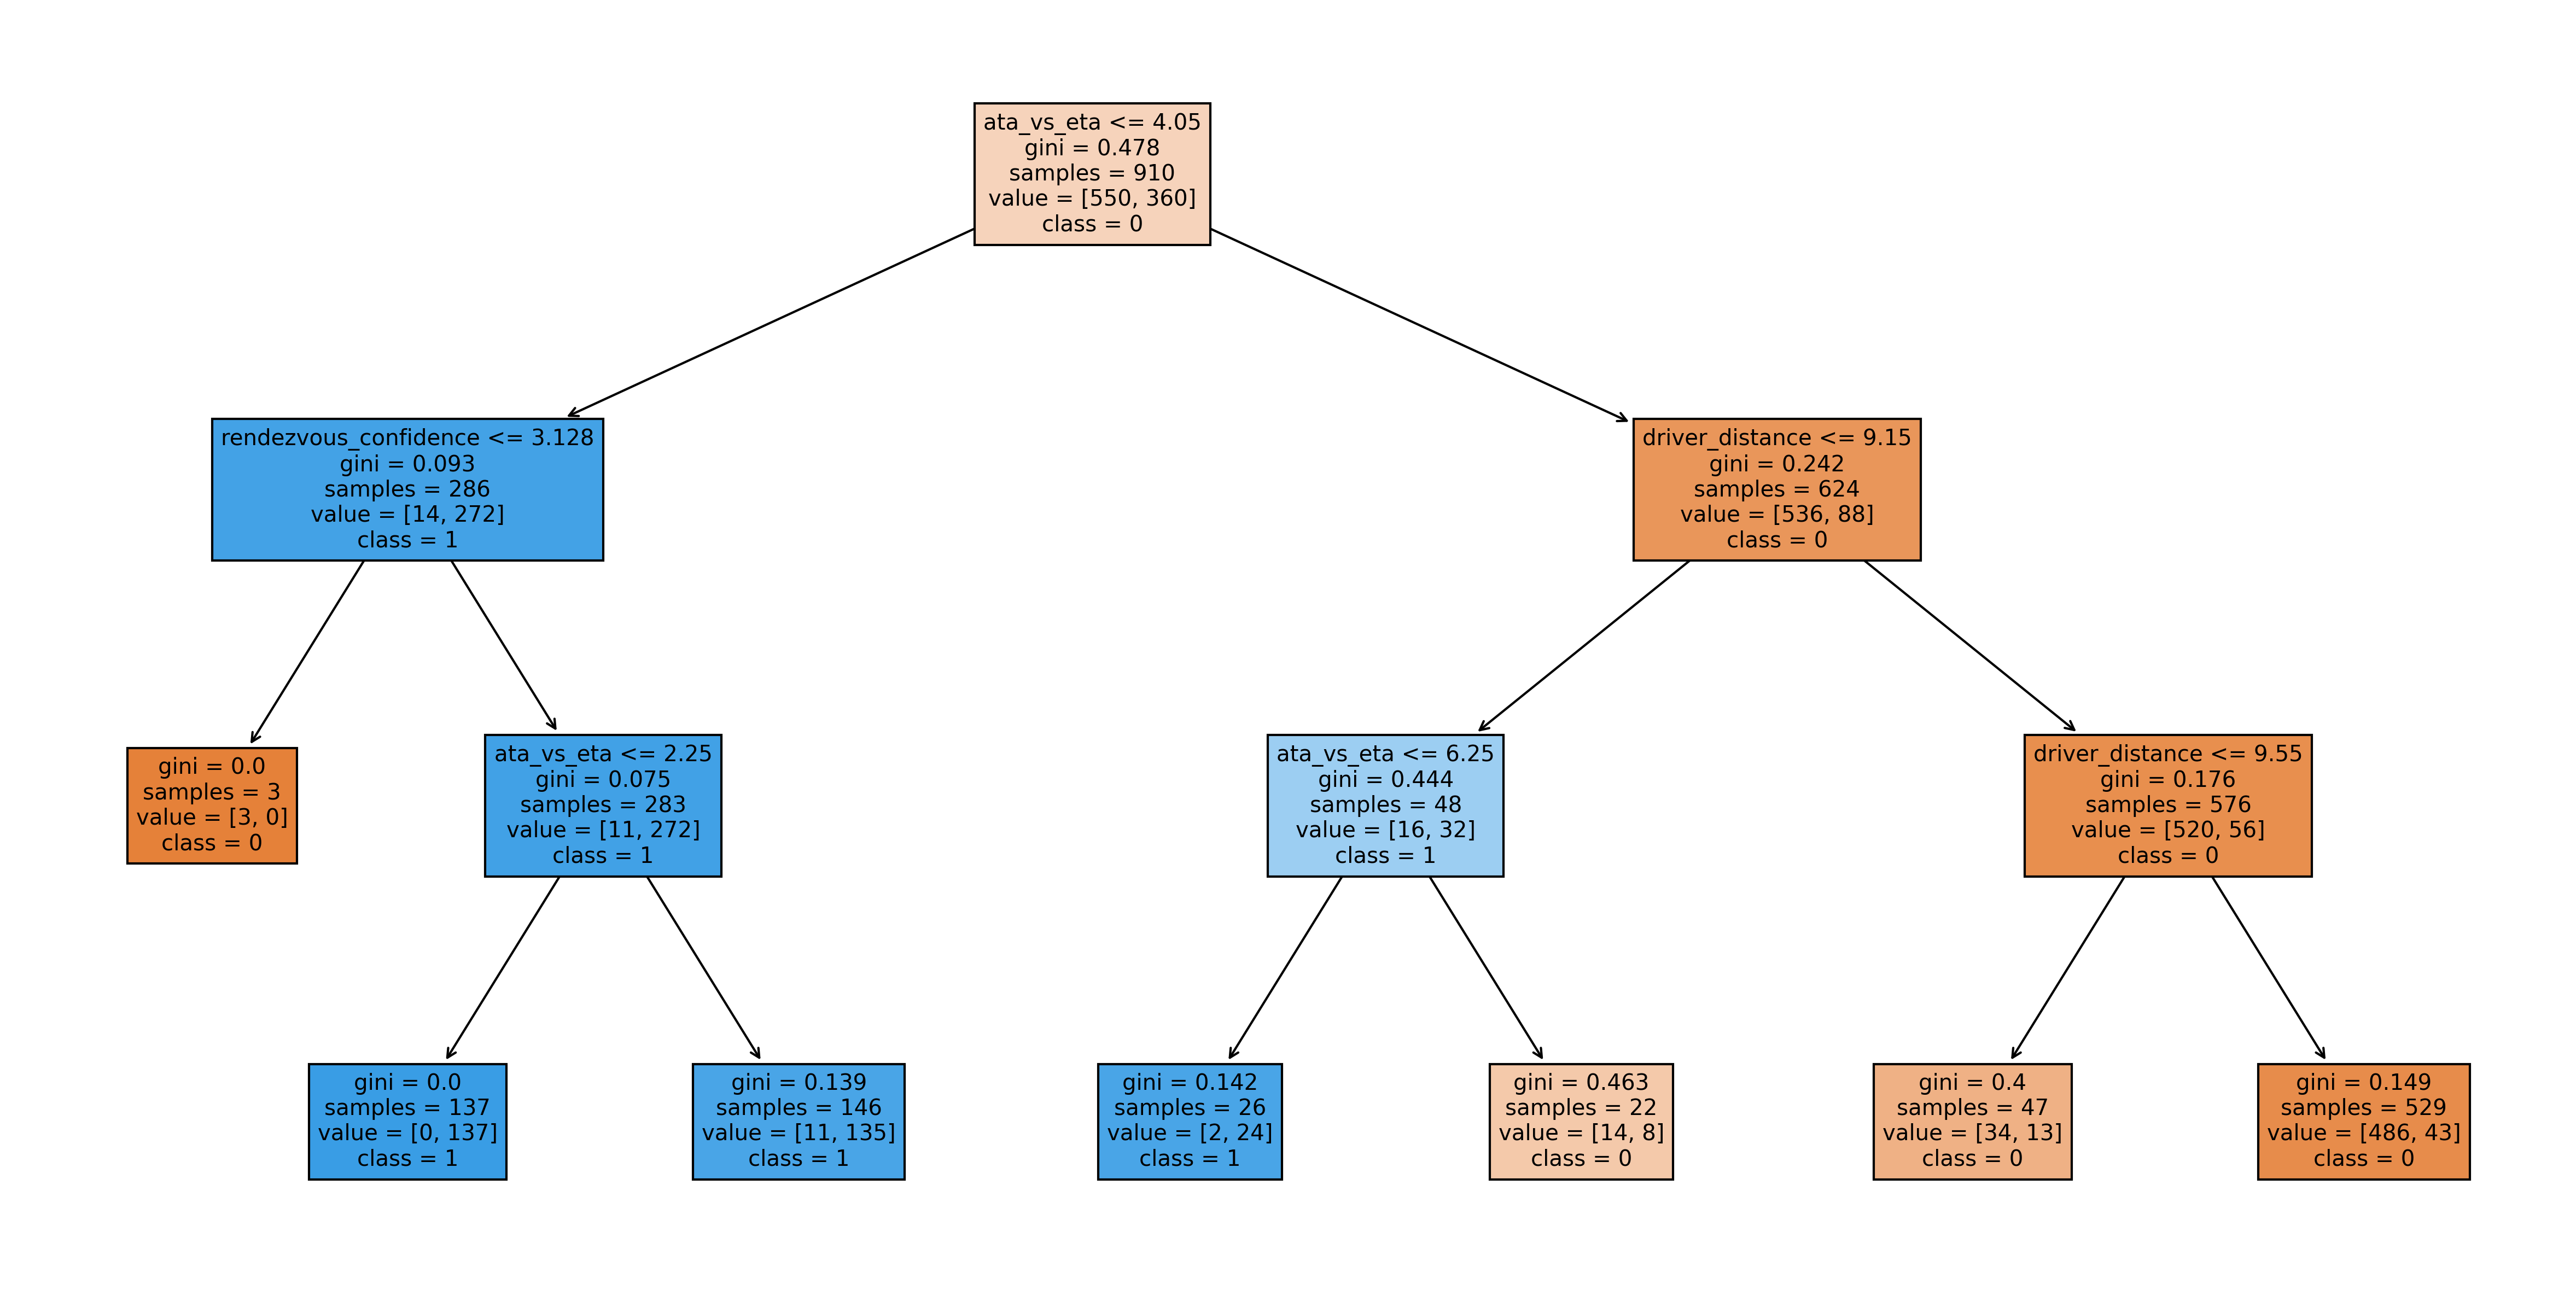

In [23]:
from sklearn.tree import plot_tree

class_names = [str(class_name) for class_name in model.classes_]

plt.figure(figsize=(20,10), dpi=300)
plot_tree(model, feature_names=X_encoded.columns, class_names=class_names, filled=True)
plt.show()



Max Depth: 1, Accuracy: 0.9078947368421053
Max Depth: 2, Accuracy: 0.9254385964912281
Max Depth: 3, Accuracy: 0.9254385964912281
Max Depth: 4, Accuracy: 0.9210526315789473
Max Depth: 5, Accuracy: 0.9122807017543859
Max Depth: 6, Accuracy: 0.9078947368421053
Max Depth: 7, Accuracy: 0.9122807017543859
Max Depth: 8, Accuracy: 0.9035087719298246
Max Depth: 9, Accuracy: 0.9078947368421053
Max Depth: 10, Accuracy: 0.9035087719298246


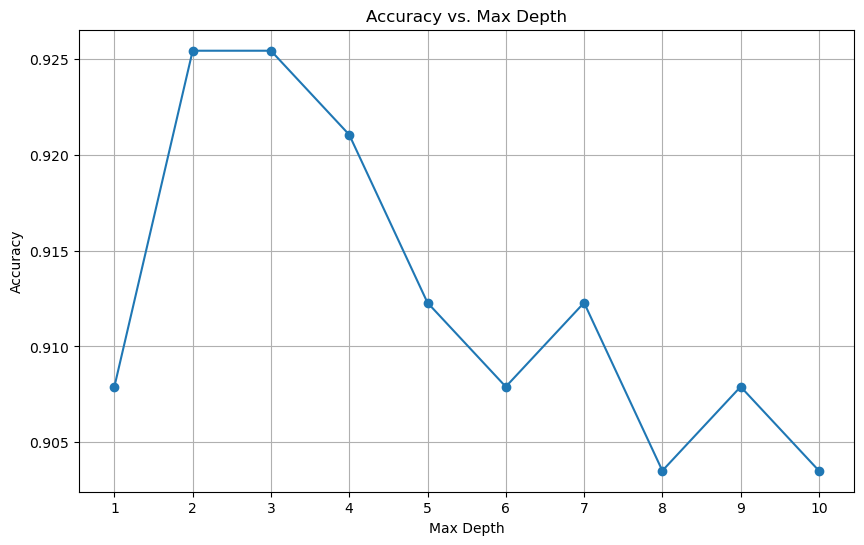

In [24]:

depths = []
accuracies = []

for depth in range(1, 11):
    model = DecisionTreeClassifier(max_depth=depth)
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    
    depths.append(depth)
    accuracies.append(accuracy)
    
    print(f"Max Depth: {depth}, Accuracy: {accuracy}")

plt.figure(figsize=(10, 6))
plt.plot(depths, accuracies, marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Max Depth')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()


## Random Forest

In [25]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)


Random Forest Accuracy: 0.9298245614035088


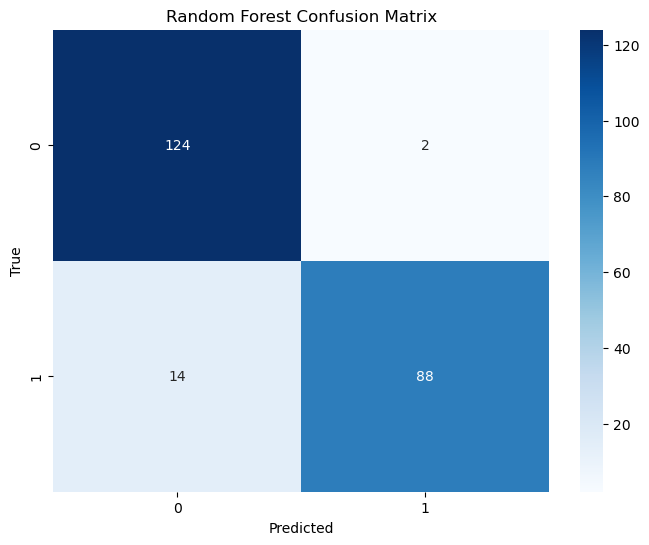

In [26]:
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Random Forest Confusion Matrix')
plt.show()

## Logistic Regression

In [27]:

log_reg_model = LogisticRegression()

log_reg_model.fit(X_train, y_train)

y_pred_log_reg = log_reg_model.predict(X_test)

accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print("Logistic Regression Accuracy:", accuracy_log_reg)


Logistic Regression Accuracy: 0.9254385964912281


C:\Users\keval\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


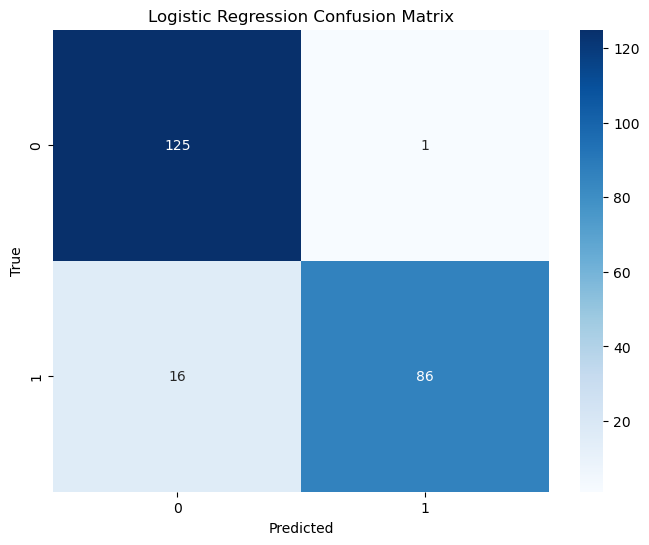

In [28]:
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_log_reg, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Logistic Regression Confusion Matrix')
plt.show()
